Optimization problem to solve:

$$
	\begin{align*}
		\text{min} \quad &\int_{0}^{t_f}||\bm{m}(t)||_2^2dt\\
		\text{s.t.}\quad
		&\dot{\bm{q}}=
		\frac{1}{2}\begin{bmatrix}
			0&-\omega_x&-\omega_y&-\omega_z\\
			\omega_x&0&\omega_z&-\omega_y\\
			\omega_y&-\omega_z&0&\omega_x\\
			\omega_z&\omega_y&-\omega_x&0
		\end{bmatrix}\bm{q}\\
		&\dot{\bm{\omega}}=
		\bm{I}^{-1}(-\bm{\omega}\times\bm{I}\bm{\omega}+\bm{m}\times([B,\text{ECI}]\bm{B}_\text{ECI,Earth}(\bm{r}))\\
		&||\bm{\omega}||_2\leq \omega_{\text{max}}\\
		&||\bm{m}||_1\leq m_{\text{max}}\\
		&\bm{q}(0)=\bm{q}_0,\quad\bm{q}(t_f)=\bm{q}_{t_f}\\
		&\bm{w}(0)=\bm{\omega}_0,\quad\bm{\omega}(t_f)=\bm{\omega}_{t_f}
	\end{align*}
$$

Given the scaling matrices and vectors $\bm{S}_x$, $\bm{S}_u$, $\bm{c}_x$, $\bm{c}_u$:

$$\hat{\bm{u}}=\begin{bmatrix}
\bm{a}\\
\bm{\tau}
\end{bmatrix},\quad\hat{\bm{u}}=\bm{S}_u\bm{u}+\bm{c}_u$$

$$\hat{\bm{x}}=\begin{bmatrix}
\bm{r}\\
\bm{v}\\
\bm{q}\\
\bm{\omega}
\end{bmatrix},\quad\hat{\bm{x}}=\bm{S}_x\bm{x}+\bm{c}_x$$

Where scaling matrices and vectors try to limit the optimization variables within $\bm{x}\in[0, 1]**n$, $\bm{u}\in[0, 1]^m$.

First, the original optimization problem is modeled as follows:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \bm{f}(\hat{\bm{x}},\hat{\bm{u}},t)\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}
$$
Where $\mathcal{X}$, $\mathcal{U}$ encompass convex restrictions.

Then, original optimization problem is transformed into (for instance, via 1st order Taylor's series):

$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{x}}+\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}},t)\hat{\bm{u}}+\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})+\bm{v}_c\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}

Defining:

$$
\begin{equation*}
\bm{A}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_x,\quad \bm{B}(t)=\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}},t)\bm{S}_u
\end{equation*}
$$
$$
\begin{equation*}
\bm{y}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_x+
\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_u+
\bm{S}_x^{-1}\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})
\end{equation*}
$$

Some matrix algebra leads to the following optimization problem:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\bm{x}}=
        \bm{A}\bm{x}+\bm{B}(t)\bm{u}+\bm{y}+\bm{v}_c\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\bm{x}\in\mathcal{X},\quad \bm{u}\in\mathcal{U}
\end{align*}
$$

Then, through discretization techniques, we need to generate:

$$
\begin{align*}
    \text{min} \quad &\mathcal{L}_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \bm{x}_{k+1}=
        \bm{A}_k\bm{x}+\bm{B}_k\bm{u}_k+\bm{y}_k+\bm{v}_{c_k}\\
    &||\bm{x}_{k}-\bar{\bm{x}}_{k}||_1+||\bm{u}_{k}-\bar{\bm{u}}_{k}||_1\leq \eta\\
    &\bm{x}_k\in\mathcal{X}_k,\quad \bm{u}_k\in\mathcal{U}_k
\end{align*}
$$

This example denotes for instance (not always):
- $\hat{\bm{x}}$ as `x_no_discrete_no_scaled`.
- $\bm{x}$ as `x_no_discrete_scaled`
- $\bm{x}_k$ as `x_discrete_scaled`
- $\bar{\bm{x}}_k$ as `ox_discrete_scaled` (last generated trajectory)

Libraries:

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R, Slerp
import time
import ecos
import math

import sympy as sp
from sympy.physics.vector import ReferenceFrame

import re

In [2]:
T = 101-1 # 101-1 means 101 discretization points
tf = 2000.0
tau_double = tf/(T)
size_N=20 #discretization accuracy
print("Step: ",tau_double," [s]")

start_quat=np.array([[0],[1],[0],[0]])
#end_quat=np.array([[0.5],[0.4],[0],[(1-0.5**2-0.4**2)**0.5]])
end_quat=np.array([[0],[0],[1],[0]])

start_w_xyz=np.array([[0.0],[0.0],[0.0]])
end_w_xyz=np.array([[0.0],[0.0],[0.0]])

start_pos_double=np.block([[start_quat],[start_w_xyz]])
end_pos_double=np.block([[end_quat],[end_w_xyz]])

J1_double=0.002 #Kg m^2
J2_double=0.002 #Kg m^2
J3_double=0.002 #Kg m^2

m_max_double = 0.2 #A m^2
omega_max_double = 5.0*np.pi/180 #rad/s

#Circular SSO assumed

mu_earth = 3.986004418e14        # [m^3/s^2] Earth gravitational parameter
R_E = 6378e3               # [m] Earth radius
h_cubesat = 500e3                  # [m] altitude
mu0_over_4pi = 1e-7       # magnetic constant factor
m_E = 7.94e22             # [A·m^2] Earth magnetic dipole moment
a_cubesat = R_E + h_cubesat

n_cubesat_double = np.sqrt(mu_earth / a_cubesat**3)    # rad/s
Omega_double = 0 # Right ascending node
inc_double = 97*math.pi # Satellite inclination SSO
B0_double = mu0_over_4pi * m_E / a_cubesat**3   # Tesla

#Guidance parameters (COGU parameters)
rho0=0.0
rho1=0.1
rho2=0.7
etta0=0.000001
etta1=10
beta_sh=2
beta_gr=2

lamb_double=1000
etta_double=10

e_tol=0.005
epsilon_stop_norm=0.00001

#scaling matrices and vectors
S_u_scaling_double=np.array([[2*(0.1*m_max_double),0,0],
                      [0,2*(0.1*m_max_double),0],
                      [0,0,2*(0.1*m_max_double)]])

c_u_scaling_double=np.array([[-(0.1*m_max_double)],
                      [-(0.1*m_max_double)],
                      [-(0.1*m_max_double)]])

S_x_scaling_double=np.array([
                      [2*1,0,0,0,0,0,0],
                      [0,2*1,0,0,0,0,0],
                      [0,0,2*1,0,0,0,0],
                      [0,0,0,2*1,0,0,0],
                      [0,0,0,0,2*(0.1*omega_max_double),0,0],
                      [0,0,0,0,0,2*(0.1*omega_max_double),0],
                      [0,0,0,0,0,0,2*(0.1*omega_max_double)]])
c_x_scaling_double=np.array([
                      [-1],
                      [-1],
                      [-1],
                      [-1],
                      [-(0.1*omega_max_double)],
                      [-(0.1*omega_max_double)],
                      [-(0.1*omega_max_double)]])

states_size = 7
inputs_size = 3
non_convex_inequalities_size = 0

Step:  20.0  [s]


In [3]:
mx, my, mz = sp.symbols('mx my mz')

t = sp.symbols('t')

q0, q1, q2, q3 = sp.symbols('q0 q1 q2 q3')
wx, wy, wz = sp.symbols('wx wy wz')


Ixx, Iyy, Izz = sp.symbols('Ixx Iyy Izz')
Ixy, Ixz, Iyz = sp.symbols('Ixy Ixz Iyz')

n_cubesat, Omega, inc, B0 = sp.symbols('n_cubesat Omega inc B0')

# Rigid body kinematics
BN = sp.Matrix([
    [q0**2 + q1**2 - q2**2 - q3**2, 2*(q1*q2 + q0*q3), 
    2*(-q0*q2 + q1*q3)], [2*(q1*q2 - q0*q3), q0**2 - q1**2 + q2**2 - q3**2, 
    2*(q0*q1 + q2*q3)], [2*(q0*q2 + q1*q3), 2*(-q0*q1 + q2*q3), 
    q0**2 - q1**2 - q2**2 + q3**2]
])

I = sp.Matrix([
    [Ixx, Ixy, Ixz],
    [Ixy, Iyy, Iyz],
    [Ixz, Iyz, Izz]
])

O_B = sp.Matrix([
    -2*sp.sin(inc)*sp.cos(n_cubesat*t),
    -sp.sin(inc)*sp.sin(n_cubesat*t),
    sp.cos(inc)
]) * B0

Nframe = ReferenceFrame('Nframe')
Oframe = Nframe.orientnew('Oframe', 'Body', [Omega, inc, n_cubesat*t], 'ZXZ')

ON = Oframe.dcm(Nframe)

BO = BN * ON.T

In [ ]:
w_sympy = sp.Matrix([wx, wy, wz])
m_sympy = sp.Matrix([mx, my, mz])

f_ridig_body = I.inv() * (- w_sympy.cross(I*w_sympy) + m_sympy.cross(BO*O_B))

#f_ridig_body = sp.simplify(f_ridig_body)

f1 = 0.5 * (-wx*q1-wy*q2-wz*q3)
f2 = 0.5 * (+wx*q0+wz*q2-wy*q3)
f3 = 0.5 * (+wy*q0-wz*q1+wx*q3)
f4 = 0.5 * (wz*q0+wy*q1-wx*q2)
f5 = f_ridig_body[0]
f6 = f_ridig_body[1]
f7 = f_ridig_body[2]

f_orig_opt_prob=[f1,f2,f3,f4,f5,f6,f7]

f_orig_opt_prob = [fi.simplify(ratio=1) for fi in f_orig_opt_prob]

x_states = [q0,q1,q2,q3,wx,wy,wz]
u_input = [mx,my,mz]

state_parameters_string = [
    "q0",
    "q1",
    "q2",
    "q3",
    "wx",
    "wy",
    "wz"
]

control_parameters_string = [
    "mx",
    "my",
    "mz"
]

time_string = [
    "t"
]

dynamic_parameters_string = [
    "Ixx",
    "Iyy",
    "Izz",
    "Ixy",
    "Ixz",
    "Iyz",
    "n_cubesat",
    "Omega",
    "inc",
    "B0"
]

[0.002, 0.002, 0.002, 0.0, 0.0, 0.0, np.float64(0.001106816514833168), 0, 304.7344873982099, 2.440248126240054e-05]


In [12]:
dynamic_parameters_double = [
    J1_double,
    J2_double,
    J3_double,
    0.000,
    0.000,
    0.000,
    n_cubesat_double,
    Omega_double,
    inc_double,
    B0_double
]

In [13]:
def replace_variables_in_string(f_str,
                                state_parameters_string,
                                control_parameters_string,
                                dynamic_parameters_string):

    # Replace states
    for i, var in enumerate(state_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"hx[{i},0]", f_str)

    # Replace inputs
    for i, var in enumerate(control_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"hu[{i},0]", f_str)

    # Replace problem parameters
    for i, var in enumerate(dynamic_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"dyn_par[{i}]", f_str)

    return f_str

def matrix_to_numpy_string(matrix, state_params, control_params, dynamic_params):
    """
    Converts a sympy symbolic matrix into a string representing a numpy.array,
    with optional variable replacement using replace_variables_in_string.

    Args:
        matrix: sympy.Matrix of any dimension.
        state_params, control_params, dynamic_params: strings for variable replacement.

    Returns:
        A string representing a numpy.array ready to be evaluated in Python.
    """

    n_rows, *rest = np.shape(matrix)
    n_cols = rest[0] if rest else 1
    
    matrix = sp.Matrix(n_rows, n_cols, lambda i, j: matrix[i*n_cols + j])

    array_str = "np.array([["

    for i in range(0,n_rows):
        for j in range(0,n_cols):
            array_str += sp.pycode(matrix[i, j])
            if j < n_cols - 1:
                array_str += ","
        if i < n_rows - 1:
            array_str += "],["
        else:
            array_str += "]])"

    # Apply variable replacement using your custom function
    array_str = replace_variables_in_string(array_str,
                                            state_params,
                                            control_params,
                                            dynamic_params)
    return array_str



#Python string creation for f_SCVx

# f
string_f_SCVx =string_f_SCVx=matrix_to_numpy_string(f_orig_opt_prob,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nf_SCVx:\n")
print(string_f_SCVx)

#A, B, y
A_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(x_states) #Sympy Jacobian (Linearization via Taylor series)

string_A_SCVx =string_A_SCVx=matrix_to_numpy_string(A_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nA_no_discrete_no_scaled:\n")
print(string_A_SCVx)

B_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_B_SCVx =string_B_SCVx=matrix_to_numpy_string(B_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nB_no_discrete_no_scaled:\n")
print(string_B_SCVx)

y_symbolic = f_orig_opt_prob-A_symbolic@np.transpose(x_states)-B_symbolic@np.transpose(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_y_SCVx =string_y_SCVx=matrix_to_numpy_string(y_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\ny_no_discrete_no_scaled:\n")
print(string_y_SCVx)


#Write f, A, B, y functions inside f_A_B_y_functions.py

filename = "f_A_B_y_functions.py"

file_content = f"""
import numpy as np
import math

def f_SCVx(hx, hu, t, dyn_par):
    return {string_f_SCVx}

def A_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_A_SCVx}

def B_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_B_SCVx}

def y_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_y_SCVx}
"""
with open(filename, "w", encoding="utf-8") as f:
    f.write(file_content)
print("\nSymbolic algebra functions implemented!")

NameError: name 'f_orig_opt_prob' is not defined

In [14]:
from f_A_B_y_functions import *

CVXpy Optimization problem (DPP compliant for cvxpygen)

In [15]:
x = cp.Variable((states_size, T + 1), name='x')
u = cp.Variable((inputs_size, T), name='u')
vc = cp.Variable((states_size, T), name='vc')

A_discrete = cp.Parameter((states_size,states_size*T), name='A_discrete')
B_discrete = cp.Parameter((states_size,inputs_size*T), name='B_discrete')
y_discrete = cp.Parameter((states_size,1*T), name='y_discrete')

tau = cp.Parameter(name='tau')
sqrt_tau = cp.Parameter(name='sqrt_tau')

start_pos = cp.Parameter((states_size,1), name='start_pos')
end_pos = cp.Parameter((states_size,1), name='end_pos')

ox_cvxpy = cp.Parameter((states_size,T + 1), name='ox_cvxpy')
ou_cvxpy = cp.Parameter((inputs_size,T), name='ou_cvxpy')

S_x_scaling = cp.Parameter((states_size,states_size), name='S_x_scaling')
S_u_scaling = cp.Parameter((inputs_size,inputs_size), name='S_u_scaling')

c_x_scaling = cp.Parameter((states_size,1), name='c_x_scaling')
c_u_scaling = cp.Parameter((inputs_size,1), name='c_u_scaling')

lamb = cp.Parameter(name='lamb')
tau_lamb = cp.Parameter(name='tau_lamb')
etta = cp.Parameter(name='etta')

omega_max = cp.Parameter(name='omega_max')

m_max = cp.Parameter(name='m_max')

constraints = [
    x[:, 0] == start_pos[:,0],
    x[:, T] == end_pos[:,0]
]

cost = 0

for k in range(0, T):
    cost += cp.sum_squares(sqrt_tau*u[0:3,k:k+1])
    cost += cp.norm(tau_lamb*vc[0:states_size, k:k+1],1)

for k in range(0, T): # from 0 to T-1
    constraints += [x[0:states_size, k+1:k+2] == A_discrete[0:states_size,states_size*k:states_size*(k+1)] @ x[0:states_size, k:k+1] + B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] @ u[0:inputs_size, k:k+1]+y_discrete[0:states_size, k:k+1]+vc[0:states_size, k:k+1]]

for k in range(0, T): # from 0 to T-1
    constraints  += [cp.norm(x[0:states_size, k:k+1]-ox_cvxpy[0:states_size,k:k+1],'inf')+cp.norm(u[0:inputs_size, k:k+1]-ou_cvxpy[0:inputs_size,k:k+1],'inf')<=etta]

constraints  += [cp.norm(x[0:states_size, T:T+1]-ox_cvxpy[0:states_size,T:T+1],'inf')+cp.norm(u[0:inputs_size, T-1:T]-ou_cvxpy[0:inputs_size,T-1:T],'inf')<=etta]

# Convex constraints
for k in range(0, T+1): # from 0 to T
    constraints += [cp.norm(S_x_scaling[4:7,4:7]@x[4:7,k:k+1]+c_x_scaling[4:7,0:1], 2)<=omega_max]
for k in range(0, T): # from 0 to T-1
    constraints += [cp.norm(S_u_scaling[0:3,0:3]@u[0:3,k:k+1]+c_u_scaling[0:3,0:1], 1)<=m_max]

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [16]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [17]:
aux_A_discrete = np.zeros((states_size,states_size*T))
aux_B_discrete = np.zeros((states_size,inputs_size*T))
aux_y_discrete = np.zeros((states_size,1*T))

In [18]:
def SCVx_scaling_x(x_no_scaled,S_x_scaling_double,c_x_scaling_double):
    x_scaled = np.linalg.inv(S_x_scaling_double)@(x_no_scaled-c_x_scaling_double)
    return x_scaled
    
def SCVx_scaling_u(u_no_scaled,S_u_scaling_double,c_u_scaling_double):
    u_scaled = np.linalg.inv(S_u_scaling_double)@(u_no_scaled-c_u_scaling_double)
    return u_scaled

def SCVx_inv_scaling_x(x_scaled,S_x_scaling_double,c_x_scaling_double):
    x_inv_scaling = S_x_scaling_double@x_scaled+c_x_scaling_double
    return x_inv_scaling
    
def SCVx_inv_scaling_u(u_scaled,S_u_scaling_double,c_u_scaling_double):
    u_inv_scaling = S_u_scaling_double@u_scaled+c_u_scaling_double
    return u_inv_scaling


def A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double):

    A_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@S_x_scaling_double

    return A_numeric

def B_no_discrete_scaled_SCVx(B_no_discrete_no_scaled, S_x_scaling_double, S_u_scaling_double):

    B_numeric = np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@S_u_scaling_double

    return B_numeric

def y_no_discrete_scaled_SCVx(A_no_discrete_no_scaled,
                              B_no_discrete_no_scaled,
                              y_no_discrete_no_scaled,
                              S_u_scaling_double, S_x_scaling_double, c_x_scaling_double, c_u_scaling_double):

    y_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@c_x_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@c_u_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@y_no_discrete_no_scaled

    return y_numeric
    
def A_B_y_discrete_scaled(ox, ou, t0, dynamic_parameters_double, tau_double,
                          S_x_scaling_double, c_x_scaling_double,
                          S_u_scaling_double, c_u_scaling_double, size_N):
    
    ohx = SCVx_inv_scaling_x(ox, S_x_scaling_double, c_x_scaling_double)
    ohu = SCVx_inv_scaling_u(ou, S_u_scaling_double, c_u_scaling_double)

    n = len(ohx)
    m = len(ohu)

    Phi = np.eye(n)
    G   = np.zeros((n, m))
    z   = np.zeros((n, 1))

    dt = tau_double / (size_N - 1)
    t  = t0

    for i in range(size_N - 1):

        # ===== k1 =====
        A1_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)
        B1_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)
        y1_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)

        A1 = A_no_discrete_scaled_SCVx(A1_no, S_x_scaling_double)
        B1 = B_no_discrete_scaled_SCVx(B1_no, S_x_scaling_double, S_u_scaling_double)
        y1 = y_no_discrete_scaled_SCVx(A1_no, B1_no, y1_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k1_Phi = A1 @ Phi
        k1_G   = A1 @ G + B1
        k1_z   = A1 @ z + y1

        # ===== k2 =====
        t2 = t + 0.5*dt
        Phi2 = Phi + 0.5*dt*k1_Phi
        G2   = G   + 0.5*dt*k1_G
        z2   = z   + 0.5*dt*k1_z

        A2_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        B2_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        y2_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)

        A2 = A_no_discrete_scaled_SCVx(A2_no, S_x_scaling_double)
        B2 = B_no_discrete_scaled_SCVx(B2_no, S_x_scaling_double, S_u_scaling_double)
        y2 = y_no_discrete_scaled_SCVx(A2_no, B2_no, y2_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k2_Phi = A2 @ Phi2
        k2_G   = A2 @ G2 + B2
        k2_z   = A2 @ z2 + y2

        # ===== k3 =====
        Phi3 = Phi + 0.5*dt*k2_Phi
        G3   = G   + 0.5*dt*k2_G
        z3   = z   + 0.5*dt*k2_z

        A3_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        B3_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        y3_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)

        A3 = A_no_discrete_scaled_SCVx(A3_no, S_x_scaling_double)
        B3 = B_no_discrete_scaled_SCVx(B3_no, S_x_scaling_double, S_u_scaling_double)
        y3 = y_no_discrete_scaled_SCVx(A3_no, B3_no, y3_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k3_Phi = A3 @ Phi3
        k3_G   = A3 @ G3 + B3
        k3_z   = A3 @ z3 + y3

        # ===== k4 =====
        t4 = t + dt
        Phi4 = Phi + dt*k3_Phi
        G4   = G   + dt*k3_G
        z4   = z   + dt*k3_z

        A4_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)
        B4_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)
        y4_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)

        A4 = A_no_discrete_scaled_SCVx(A4_no, S_x_scaling_double)
        B4 = B_no_discrete_scaled_SCVx(B4_no, S_x_scaling_double, S_u_scaling_double)
        y4 = y_no_discrete_scaled_SCVx(A4_no, B4_no, y4_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k4_Phi = A4 @ Phi4
        k4_G   = A4 @ G4 + B4
        k4_z   = A4 @ z4 + y4

        # ===== Update =====
        Phi += (dt/6)*(k1_Phi + 2*k2_Phi + 2*k3_Phi + k4_Phi)
        G   += (dt/6)*(k1_G   + 2*k2_G   + 2*k3_G   + k4_G)
        z   += (dt/6)*(k1_z   + 2*k2_z   + 2*k3_z   + k4_z)

        t += dt

    return Phi, G, z

In [19]:
def slerp(q1, q2, num_samples):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)

    if np.abs(theta_0) < 1e-6:
        return np.linspace(q1, q2, num_samples)

    sin_theta_0 = np.sin(theta_0)

    quaternions = []
    for i in range(num_samples):
        t = i / (num_samples - 1)
        theta = theta_0 * t
        sin_theta = np.sin(theta)
        s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
        s1 = sin_theta / sin_theta_0
        quaternions.append(s0 * q1 + s1 * q2)

    return np.array(quaternions)

def compute_angular_velocity(quaternions, dt):

    rotations = R.from_quat(quaternions)
    angular_velocities = [[0,0,0]]

    for i in range(len(rotations) - 1):
        delta_rot = rotations[i + 1] * rotations[i].inv()
        log_rot = delta_rot.as_rotvec() / dt
        angular_velocities.append(log_rot)

    return np.array(angular_velocities)

# Initial trajectory (without scaling)

ox_quat = slerp(start_pos_double[0:4,0], end_pos_double[0:4,0],T+1).T
ox_angvel = compute_angular_velocity(ox_quat.T, tau_double).T

ox=np.zeros((7,T+1))
ox[0:4,:]=ox_quat
ox[4:7,:]=ox_angvel

ou=np.zeros((inputs_size,T))

# Initial trajectory (with scaling)
for t in range(0, T + 1):
    ox[0:states_size,t:t+1] = SCVx_scaling_x(ox[0:states_size,t:t+1],S_x_scaling_double,c_x_scaling_double)

for t in range(0, T):
    ou[0:inputs_size,t:t+1] = SCVx_scaling_u(ou[0:inputs_size,t:t+1],S_u_scaling_double,c_u_scaling_double)

In [20]:
def f_rk4_step(xk, uk, t, dt, dynamic_parameters,
               S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)
    k1 = f_SCVx(xk_no_scaled, uk_no_scaled, t, dynamic_parameters)
    k2 = f_SCVx(xk_no_scaled + 0.5 * dt * k1, uk_no_scaled, t + 0.5*dt, dynamic_parameters)
    k3 = f_SCVx(xk_no_scaled + 0.5 * dt * k2, uk_no_scaled, t + 0.5*dt, dynamic_parameters)
    k4 = f_SCVx(xk_no_scaled + dt * k3, uk_no_scaled, t + dt, dynamic_parameters)
    return xk_no_scaled + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def f_Euler_step(xk, uk, t, dt, dynamic_parameters,
                 S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):

    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)

    return xk_no_scaled + dt * f_SCVx(xk_no_scaled, uk_no_scaled, t, dynamic_parameters)

def J_SCVx(x,u,T,tau_double, dynamic_parameters,
           S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau_double*np.linalg.norm(u[0:3,k:k+1], ord=2)**2

    for k in range(0, T): # from 0 to T-1

        flow_map = f_rk4_step(x[0:, k:k+1], u[:, k:k+1], k/T*tf, tau_double, dynamic_parameters,
        S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)

        SCVx_defect = SCVx_inv_scaling_x(x[:, k+1:k+2],S_x_scaling_double,c_x_scaling_double)-flow_map

        cost += tau_double*np.linalg.norm(lamb_double*SCVx_defect, ord=1)

    return cost

In [21]:
ox_cvxpy.value=ox #trajectory initialization (already scaled)
ou_cvxpy.value=ou #trajectory initialization (already scaled)

tau.value = tau_double
sqrt_tau.value = (tau_double)**0.5

lamb.value = lamb_double

tau_lamb.value = tau_double*lamb_double
etta.value = etta_double

S_x_scaling.value = S_x_scaling_double
S_u_scaling.value = S_u_scaling_double

c_x_scaling.value = c_x_scaling_double
c_u_scaling.value = c_u_scaling_double

omega_max.value = omega_max_double
m_max.value = m_max_double

start_pos.value = SCVx_scaling_x(start_pos_double,S_x_scaling_double,c_x_scaling_double)
end_pos.value = SCVx_scaling_x(end_pos_double,S_x_scaling_double,c_x_scaling_double)

t0 = time.time()

i=1
no_first_iterations = False
while True:

    for k in range(0, T):
        aux_aux_A_discrete, aux_aux_B_discrete, aux_aux_y_discrete = A_B_y_discrete_scaled(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1], k/T*tf, dynamic_parameters_double, tau_double,
                          S_x_scaling_double, c_x_scaling_double,
                          S_u_scaling_double, c_u_scaling_double, size_N)

        aux_A_discrete[0:states_size,states_size*k:states_size*(k+1)] = np.copy(aux_aux_A_discrete)
        
        aux_B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] = np.copy(aux_aux_B_discrete)
        
        aux_y_discrete[0:states_size,k:k+1] = np.copy(aux_aux_y_discrete)
    
    #print(aux_B_discrete_qw_scaled[0:7,3*10:3*10+3])

    A_discrete.value = np.copy(aux_A_discrete)
    B_discrete.value = np.copy(aux_B_discrete)
    y_discrete.value = np.copy(aux_y_discrete)

    val=problem.solve(solver='ECOS',ignore_dpp=True) #IF YOU USE CVXPYGEN: ignore_dpp=False

    vc_opt=np.copy(vc.value)
    x_opt=np.copy(x.value)
    u_opt=np.copy(u.value)

    L_SCVx_opt=val

    J_SCVx_opt=J_SCVx(x_opt,u_opt,T,tau_double, dynamic_parameters_double,
                      S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)
    oJ_SCVx=J_SCVx(ox,ou,T,tau_double, dynamic_parameters_double,
                      S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)
    
    print("L_SCVx_opt: "+str(val)+"J_SCVx_opt: "+str(J_SCVx_opt)+" oJ_SCVx: "+str(oJ_SCVx)+" Norm_x_diff: "+str(np.max(np.linalg.norm((x_opt-ox), ord=2,axis=0))))

    
    Delta_J_SCVx=oJ_SCVx-J_SCVx_opt
    #Delta_L_SCVx=J_SCVx_opt-L_SCVx_opt
    Delta_L_SCVx=oJ_SCVx-L_SCVx_opt

    if (Delta_L_SCVx<e_tol*np.abs(oJ_SCVx) or np.max(np.linalg.norm((x_opt-ox), ord=1,axis=0))<epsilon_stop_norm) and no_first_iterations:
      x_global=np.copy(ox)
      u_global=np.copy(ou)
      break;
    else:
      rho_i=Delta_J_SCVx/Delta_L_SCVx
      if rho_i<rho0:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(ox)
        ou=np.copy(ou)
      if rho_i>=rho0 and rho_i<rho1:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho1 and rho_i<rho2:
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho2:
        etta.value=min([etta1,beta_gr*etta.value])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)

      print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta.value, " Rho: ",rho_i)

    ox_cvxpy.value=np.copy(ox)
    ou_cvxpy.value=np.copy(ou)


    if i==3:
        no_first_iterations = True
    i=i+1
    
t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

L_SCVx_opt: 1001.0604665745992J_SCVx_opt: 247745.44231879985 oJ_SCVx: 81214.80220979905 Norm_x_diff: 0.8635566585511424
 Iteration number:  1  Cost function:  1001.0604665745992  Etta:  5.0  Rho:  -2.0760861728915345
L_SCVx_opt: 1001.0604666164205J_SCVx_opt: 247745.31210797335 oJ_SCVx: 81214.80220979905 Norm_x_diff: 0.8635568341921733
 Iteration number:  2  Cost function:  1001.0604666164205  Etta:  2.5  Rho:  -2.0760845495943685
L_SCVx_opt: 1001.0604666167986J_SCVx_opt: 247745.99366444096 oJ_SCVx: 81214.80220979905 Norm_x_diff: 0.8635582897085573
 Iteration number:  3  Cost function:  1001.0604666167986  Etta:  1.25  Rho:  -2.0760930463488347
L_SCVx_opt: 1001.0604666369184J_SCVx_opt: 247745.34086129037 oJ_SCVx: 81214.80220979905 Norm_x_diff: 0.8635562166610411
 Iteration number:  4  Cost function:  1001.0604666369184  Etta:  0.625  Rho:  -2.076084908053642
L_SCVx_opt: 1119.139614051699J_SCVx_opt: 112954.9598701583 oJ_SCVx: 81214.80220979905 Norm_x_diff: 0.5992737590755164
 Iteration n

c:\Users\franklin\anaconda3\envs\cvxpygen\lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


L_SCVx_opt: 353.20902112522833J_SCVx_opt: 1804.5367377339128 oJ_SCVx: 1327.816269340836 Norm_x_diff: 0.09334027827810772
 Iteration number:  14  Cost function:  353.20902112522833  Etta:  0.0390625  Rho:  -0.48914110711355413
L_SCVx_opt: 401.9583824524132J_SCVx_opt: 1134.612609388753 oJ_SCVx: 1327.816269340836 Norm_x_diff: 0.046848231686916875
 Iteration number:  15  Cost function:  401.9583824524132  Etta:  0.0390625  Rho:  0.20867528665915694
L_SCVx_opt: 377.28090235413185J_SCVx_opt: 1141.3318542742659 oJ_SCVx: 1134.612609388753 Norm_x_diff: 0.04796933554882961
 Iteration number:  16  Cost function:  377.28090235413185  Etta:  0.01953125  Rho:  -0.008872261418741364
L_SCVx_opt: 452.87431038960057J_SCVx_opt: 1080.3358844663226 oJ_SCVx: 1134.612609388753 Norm_x_diff: 0.02313741512211239
 Iteration number:  17  Cost function:  452.87431038960057  Etta:  0.009765625  Rho:  0.07961519105221633
L_SCVx_opt: 472.24333806608394J_SCVx_opt: 1092.7049545246778 oJ_SCVx: 1080.3358844663226 Norm_x_

KeyboardInterrupt: 

In [24]:
print(np.linalg.norm((vc.value[:, :]), ord=1))

print("vc error (quaternion):")
print(np.linalg.norm((vc.value[0:4, :]), ord=1))

print("vc error (ang. velocity):")
print(np.linalg.norm((vc.value[4:7, :]), ord=1))

0.003940060468195372
vc error (quaternion):
0.00275643029330297
vc error (ang. velocity):
0.0012996992855810992


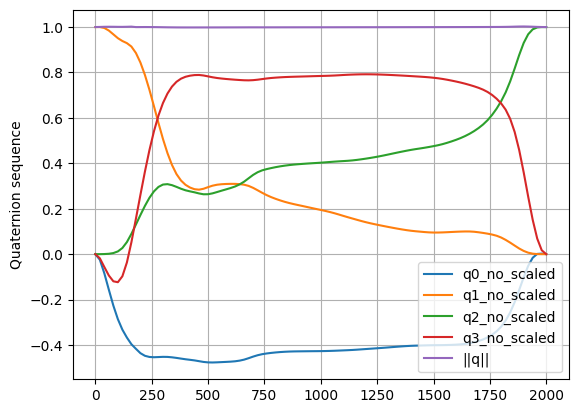

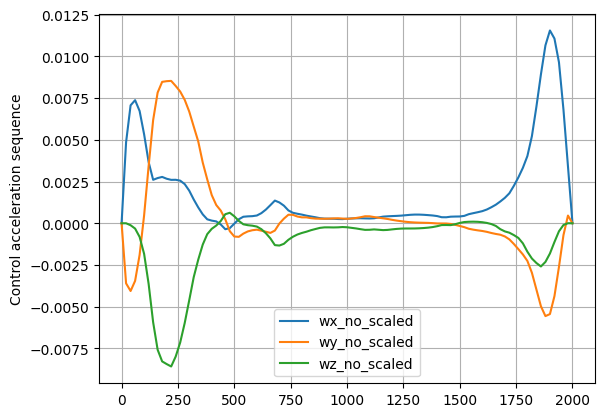

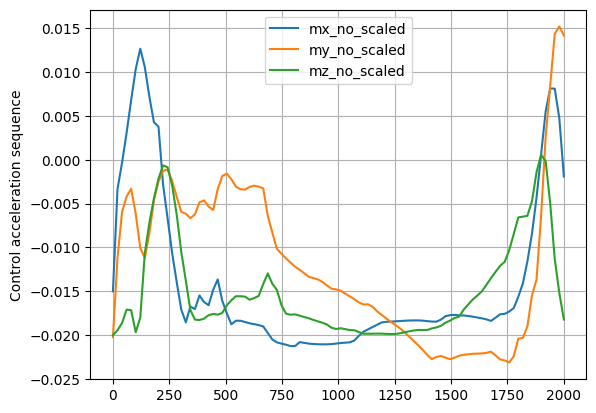

In [25]:
# Plot (scaled initial trajectories)
def global_inv_scaling(x,S,c,T):
    for i in range(0,T,1):
        x[:,i:i+1]=S@x[:,i:i+1]+c
    return x
#x_value = np.copy(x_global)
#u_value = np.copy(u_global)
x_value=global_inv_scaling(np.copy(ox),S_x_scaling_double,c_x_scaling_double,T+1)
u_value=global_inv_scaling(np.copy(ou),S_u_scaling_double,c_u_scaling_double,T)

plt.figure(1)
plt.plot(np.linspace(0, tf, T+1), x_value[0,:], label='q0_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[1,:], label='q1_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[2,:], label='q2_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[3,:], label='q3_no_scaled')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(x_value[0:4,:],axis=0), label='||q||')
plt.ylabel('Quaternion sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(4)
plt.plot(np.linspace(0, tf, T+1), x_value[4,:], label='wx_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[5,:], label='wy_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[6,:], label='wz_no_scaled')

plt.ylabel('Control acceleration sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)


plt.figure(6)
plt.plot(np.linspace(0, tf, T), u_value[0,:], label='mx_no_scaled')
plt.plot(np.linspace(0, tf, T), u_value[1,:], label='my_no_scaled')
plt.plot(np.linspace(0, tf, T), u_value[2,:], label='mz_no_scaled')

plt.ylabel('Control acceleration sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)